# # 🚀 Ready to Dive In? Let's Calculate AQI!
**Here's a step-by-step guide and some Python code to get you started:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sample data
data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'PM2.5': [40, 80, 20, 100, 60],
    'PM10': [120, 200, 50, 250, 180],
    'O3': [70, 90, 30, 120, 110],
    'NO2': [50, 60, 40, 80, 55],
    'SO2': [20, 40, 10, 60, 30],
    'CO': [2, 4, 1, 5, 3]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])


In [4]:

# Define breakpoints for AQI calculation
breakpoints = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
    'O3': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 500, 401, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
    'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
    'CO': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)]
}



# Function to calculate individual pollutant index
def calculate_aqi(concentration, breakpoints):
    for low, high, aqi_low, aqi_high in breakpoints:
        if low <= concentration <= high:
            return ((aqi_high - aqi_low) / (high - low)) * (concentration - low) + aqi_low
    return None  # If the concentration is out of the defined range



# Calculate AQI for each pollutant
pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
for pollutant in pollutants:
    df[f'{pollutant}_AQI'] = df[pollutant].apply(lambda x: calculate_aqi(x, breakpoints[pollutant]))

# Calculate the overall AQI as the maximum AQI value among the pollutants
df['AQI'] = df[[f'{pollutant}_AQI' for pollutant in pollutants]].max(axis=1)

# Display the data with AQI values
df

,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_AQI,PM10_AQI,O3_AQI,NO2_AQI,SO2_AQI,CO_AQI,AQI
0,2023-01-01,40,120,70,50,20,2,112.080402,83.171717,100.000000,47.169811,28.571429,22.727273,112.080402
1,2023-01-02,80,200,90,60,40,4,163.650158,123.272727,161.315789,57.391304,56.025641,45.454545,163.650158
2,2023-01-03,20,50,30,40,10,1,67.613734,46.296296,27.777778,37.735849,14.285714,11.363636,67.613734
3,2023-01-04,100,250,120,80,60,5,173.976818,148.020202,215.744681,78.695652,81.153846,56.000000,215.744681
4,2023-01-05,60,180,110,55,30,3,153.323498,113.373737,205.212766,52.065217,42.857143,34.090909,205.212766


# Daily AQI Over Time Line Plot

 **If the line plot shows a significant increase in AQI values over a few days, it might indicate an event like a wildfire, increased industrial activity, or unusual weather conditions that worsened air quality.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


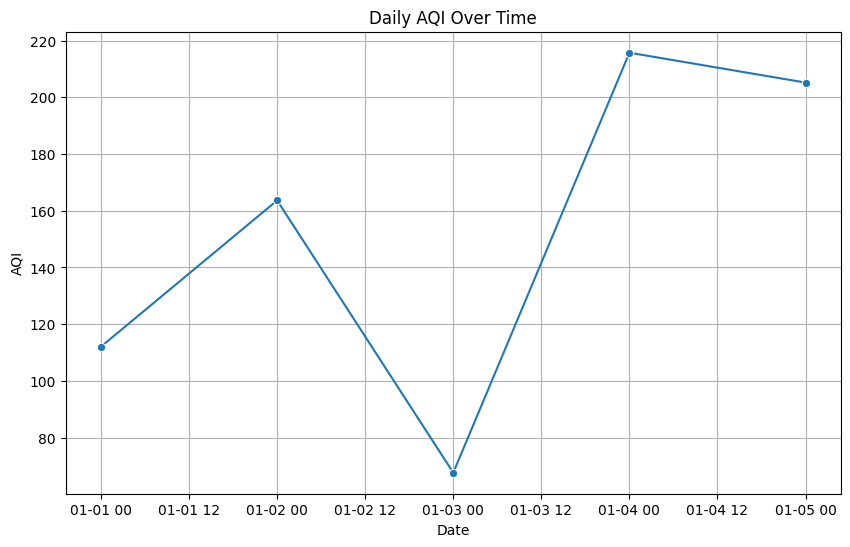

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='AQI', data=df, marker='o')
plt.title('Daily AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

#  Distribution of AQI for Each Pollutant

 **If the distribution of PM2.5 AQI values shows a peak at higher values compared to other pollutants, it suggests that PM2.5 is a major contributor to poor air quality in the dataset.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

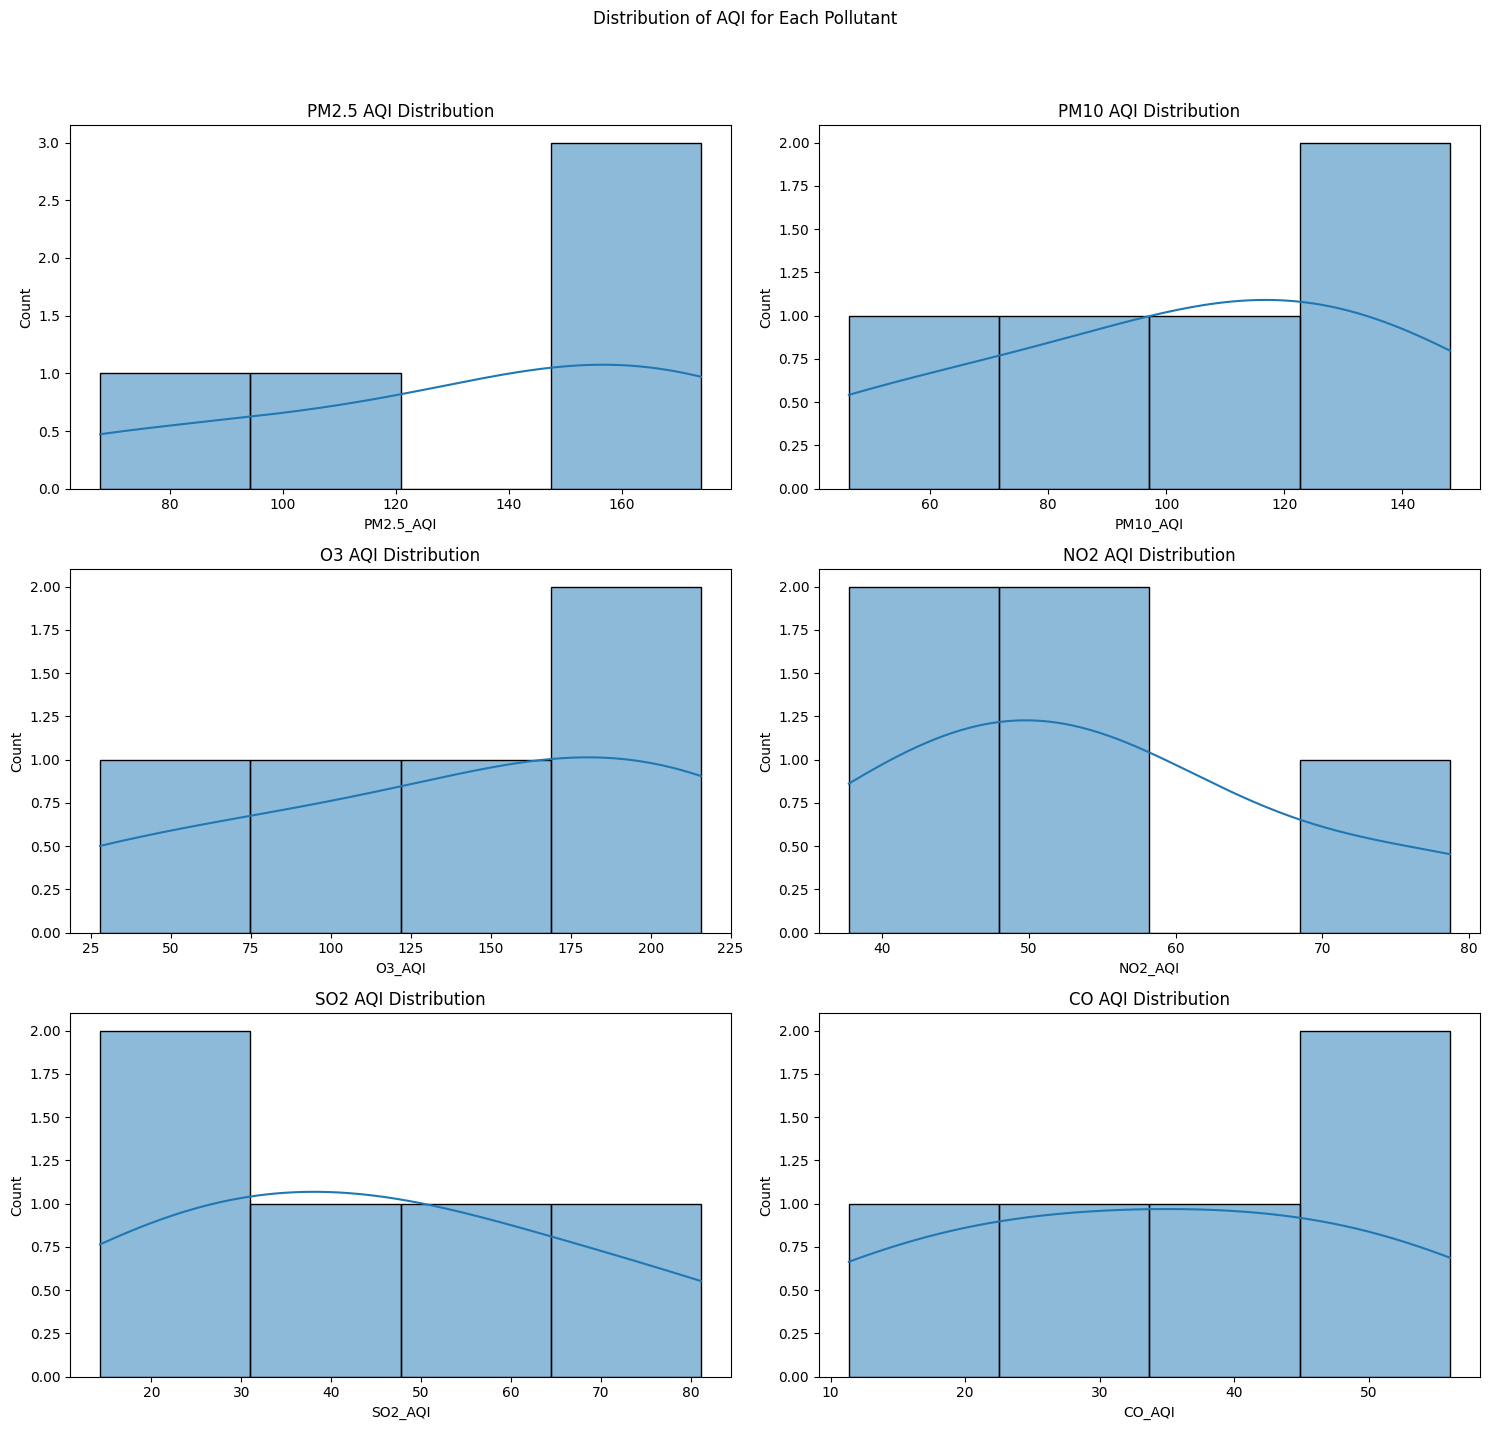

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of AQI for Each Pollutant')

for ax, pollutant in zip(axs.flat, pollutants):
    sns.histplot(df[f'{pollutant}_AQI'], kde=True, ax=ax)
    ax.set_title(f'{pollutant} AQI Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
